In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from termcolor import colored
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

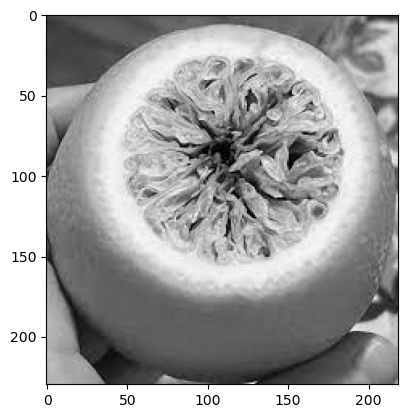

In [3]:
img = cv2.imread('Dataset_Orange/Single_Pred/rottenoranges/rotten.jpeg',0)
plt.imshow(img,cmap = 'gray')

In [4]:
img.max()

255

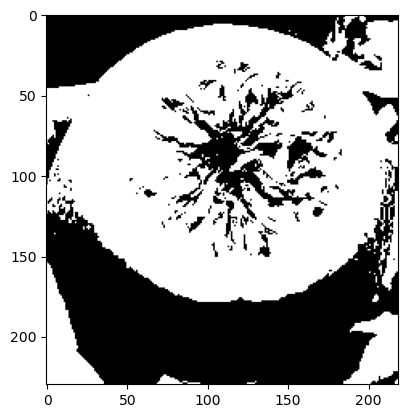

In [5]:
ret, thresh1 = cv2.threshold(img,123,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap = 'gray')

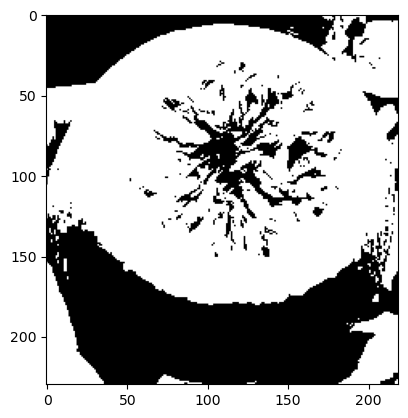

In [6]:
ret, thresh2 = cv2.threshold(img,123,255,cv2.THRESH_TRIANGLE)
plt.imshow(thresh2,cmap = 'gray')

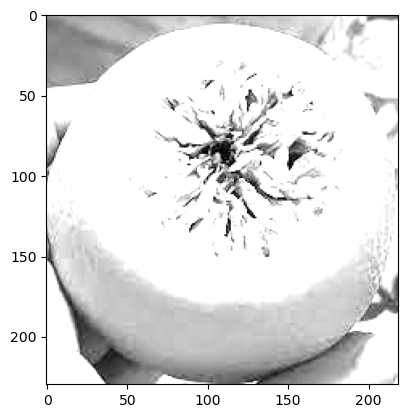

In [7]:
ret3,thresh3 = cv2.threshold(img,123,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap = 'gray')

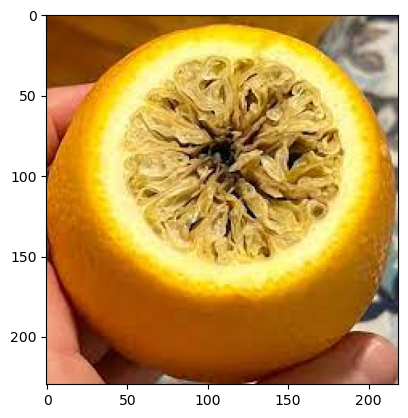

In [8]:
road = cv2.imread('Dataset_Orange/Single_Pred/rottenoranges/rotten.jpeg')
road = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
plt.imshow(road)

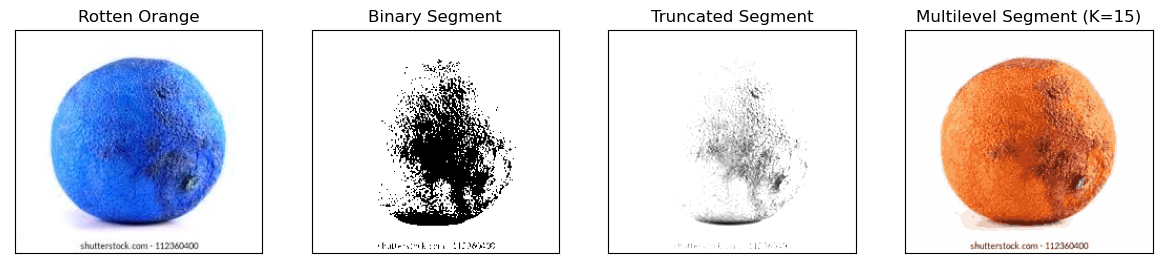

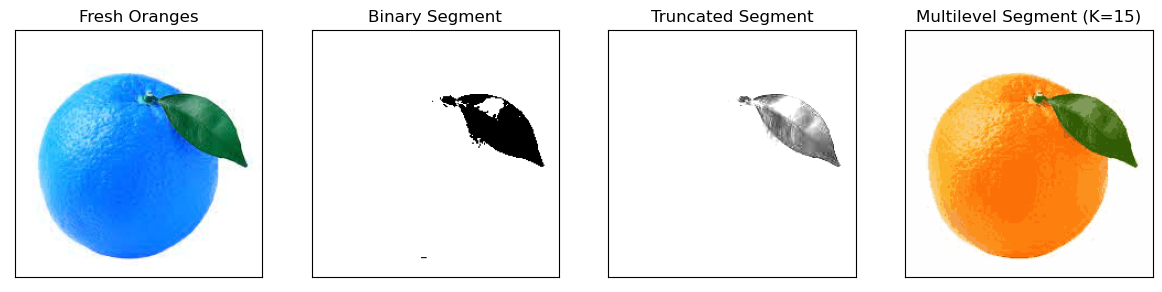

In [10]:

road = cv2.imread('Dataset_Orange/Single_Pred/rottenoranges/rotten1.jpeg')
road = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
vectorized = road.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 15
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 30
plt.figure(figsize=(figure_size,figure_size))


imggray = cv2.imread('Dataset_Orange/Single_Pred/rottenoranges/rotten1.jpeg',0)

plt.subplot(2,8,1),plt.imshow(img)
plt.title('Rotten Orange'), plt.xticks([]), plt.yticks([])

ret, thresh1 = cv2.threshold(imggray,123,255,cv2.THRESH_BINARY)
plt.subplot(2,8,2),plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary Segment'), plt.xticks([]), plt.yticks([])

ret3,thresh3 = cv2.threshold(imggray,123,255,cv2.THRESH_TRUNC)
plt.subplot(2,8,3),plt.imshow(thresh3,cmap = 'gray')
plt.title('Truncated Segment'), plt.xticks([]), plt.yticks([])


plt.subplot(2,8,4),plt.imshow(result_image)
plt.title('Multilevel Segment (K=15)'), plt.xticks([]), plt.yticks([])





road = cv2.imread('Dataset_Orange/Single_Pred/freshoranges/fresh1.jpeg')
road = cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(road,cv2.COLOR_BGR2RGB)
vectorized = road.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 15
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 30
plt.figure(figsize=(figure_size,figure_size))



imggray = cv2.imread('Dataset_Orange/Single_Pred/freshoranges/fresh1.jpeg',0)

plt.subplot(2,8,5),plt.imshow(img)
plt.title('Fresh Oranges'), plt.xticks([]), plt.yticks([])

ret, thresh1 = cv2.threshold(imggray,123,255,cv2.THRESH_BINARY)
plt.subplot(2,8,6),plt.imshow(thresh1,cmap = 'gray')
plt.title('Binary Segment'), plt.xticks([]), plt.yticks([])

ret3,thresh3 = cv2.threshold(imggray,123,255,cv2.THRESH_TRUNC)
plt.subplot(2,8,7),plt.imshow(thresh3,cmap = 'gray')
plt.title('Truncated Segment'), plt.xticks([]), plt.yticks([])


plt.subplot(2,8,8),plt.imshow(result_image)
plt.title('Multilevel Segment (K=15)'), plt.xticks([]), plt.yticks([])


plt.show()

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = 'Dataset_Orange/train'
valid_path = 'Dataset_Orange/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('Dataset_Orange/train/*')

In [ ]:
print(folders)

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('Dataset_Orange/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_set = test_datagen.flow_from_directory('Dataset_Orange/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
model.evaluate(test_set)

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc,"go-", label='Training Accuracy')
plt.plot(epochs_range, val_acc,"ro-", label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('AccurateValue_acc_points')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss,"go-", label='Training Loss')
plt.plot(epochs_range, val_loss,"ro-", label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('LossValue_loss_points')

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('LossVal_loss_withoutPoints')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc_withoutPoints')

In [ ]:
test_pred = model.predict(test_set)

In [ ]:
output = [np.argmax(op) for op in test_pred]
df_output = pd.DataFrame(output)
print(df_output.value_counts())

In [ ]:
def img_preprocessing(path):
    sample_mask_img = cv2.imread(path)
    sample_mask_img = cv2.resize(sample_mask_img,(256,256))
    plt.imshow(sample_mask_img)
    sample_mask_img = np.reshape(sample_mask_img,[1,256,256,3])
    sample_mask_img = sample_mask_img/255.0
    res = np.argmax(model.predict(sample_mask_img))
    print(res)

In [ ]:
img_preprocessing('Dataset_Orange/Single_Pred/rottenoranges/rotten.jpeg')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = model.predict_generator(test_set, steps=test_steps_per_epoch)


predicted_classes = [1 * (x[0]>=0.5) for x in predictions]


true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 


import sklearn
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)
cm = confusion_matrix(test_set.classes, predicted_classes) 
print(cm)
;l
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
classes = test_set.class_indices.keys()

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
# tick_marks = np.arange(len(classes))
# plt.xticks(test_set, classes, rotation=45)
# plt.yticks(predicted_classes, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()